# Threatened species

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join(path, 'datasets', 'Threatened Species.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,4,Afghanistan,2004,Threatened Species: Vertebrates (number),31,NaN,"World Conservation Union (IUCN), Gland and Cam..."
1,4,Afghanistan,2010,Threatened Species: Vertebrates (number),31,NaN,"World Conservation Union (IUCN), Gland and Cam..."
2,4,Afghanistan,2015,Threatened Species: Vertebrates (number),31,NaN,"World Conservation Union (IUCN), Gland and Cam..."
3,4,Afghanistan,2018,Threatened Species: Vertebrates (number),34,NaN,"World Conservation Union (IUCN), Gland and Cam..."
4,4,Afghanistan,2019,Threatened Species: Vertebrates (number),33,NaN,"World Conservation Union (IUCN), Gland and Cam..."
...,...,...,...,...,...,...,...
6915,716,Zimbabwe,2015,Threatened Species: Total (number),60,NaN,"World Conservation Union (IUCN), Gland and Cam..."
6916,716,Zimbabwe,2018,Threatened Species: Total (number),95,NaN,"World Conservation Union (IUCN), Gland and Cam..."
6917,716,Zimbabwe,2019,Threatened Species: Total (number),103,NaN,"World Conservation Union (IUCN), Gland and Cam..."
6918,716,Zimbabwe,2020,Threatened Species: Total (number),122,NaN,"World Conservation Union (IUCN), Gland and Cam..."


In [5]:
df.shape

(6920, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6920 entries, 0 to 6919
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region/Country/Area  6920 non-null   int64 
 1   Unnamed: 1           6920 non-null   object
 2   Year                 6920 non-null   int64 
 3   Series               6920 non-null   object
 4   Value                6920 non-null   int64 
 5   Footnotes            114 non-null    object
 6   Source               6920 non-null   object
dtypes: int64(3), object(4)
memory usage: 378.6+ KB


In [7]:
df.rename(                                                               # rename columns
    columns={
        'Region/Country/Area': 'Code', 
        'Unnamed: 1': 'Region/Country/Area'}, inplace=True)

df.head()    

,Code,Region/Country/Area,Year,Series,Value,Footnotes,Source
0,4,Afghanistan,2004,Threatened Species: Vertebrates (number),31,NaN,"World Conservation Union (IUCN), Gland and Cam..."
1,4,Afghanistan,2010,Threatened Species: Vertebrates (number),31,NaN,"World Conservation Union (IUCN), Gland and Cam..."
2,4,Afghanistan,2015,Threatened Species: Vertebrates (number),31,NaN,"World Conservation Union (IUCN), Gland and Cam..."
3,4,Afghanistan,2018,Threatened Species: Vertebrates (number),34,NaN,"World Conservation Union (IUCN), Gland and Cam..."
4,4,Afghanistan,2019,Threatened Species: Vertebrates (number),33,NaN,"World Conservation Union (IUCN), Gland and Cam..."


In [8]:
df.drop(columns=['Footnotes', 'Source'], inplace=True)                      # drop footnotes and source columns

In [9]:
df.head()

,Code,Region/Country/Area,Year,Series,Value
0,4,Afghanistan,2004,Threatened Species: Vertebrates (number),31
1,4,Afghanistan,2010,Threatened Species: Vertebrates (number),31
2,4,Afghanistan,2015,Threatened Species: Vertebrates (number),31
3,4,Afghanistan,2018,Threatened Species: Vertebrates (number),34
4,4,Afghanistan,2019,Threatened Species: Vertebrates (number),33


In [10]:
df.describe(include='object')   

,Region/Country/Area,Series
count,6920,6920
unique,253,4
top,Afghanistan,Threatened Species: Total (number)
freq,28,1731


In [11]:
df['Region/Country/Area'].unique()

array(['Afghanistan', '�land Islands', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua and Barbuda', 'Areas n.e.s', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurin. State of)', 'Bonaire, St. Eustatius & Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil',
       'British Indian Ocean Terr.', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'Christmas Island',
       'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'C�te d�Ivoire', 'Croatia', 'Cuba',
    

In [12]:
df['Year'].value_counts()

2021    999
2019    998
2015    996
2020    996
2018    995
2010    984
2004    952
Name: Year, dtype: int64

In [13]:
df['Series'].value_counts()

Threatened Species: Total (number)            1731
Threatened Species: Invertebrates (number)    1730
Threatened Species: Plants (number)           1730
Threatened Species: Vertebrates (number)      1729
Name: Series, dtype: int64

In [14]:
df['Code'].value_counts().head()

4      28
296    28
524    28
528    28
540    28
Name: Code, dtype: int64

# Data Cleaning

In [15]:
df['Region/Country/Area'].replace(
    {'C�te d�Ivoire': "Côte d'Ivoire", 
    'Cura�ao': 'Curaçao',
    'R�union': 'Réunion',
    'Saint Barth�lemy': 'Saint Barthélemy'}, inplace=True
)

df['Region/Country/Area'].unique()

array(['Afghanistan', '�land Islands', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua and Barbuda', 'Areas n.e.s', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurin. State of)', 'Bonaire, St. Eustatius & Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil',
       'British Indian Ocean Terr.', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'Christmas Island',
       'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba',
    

In [16]:
df['Value'].describe()

count    6920.000000
mean       95.823266
std       206.518618
min         0.000000
25%        10.000000
50%        37.000000
75%        93.000000
max      3664.000000
Name: Value, dtype: float64

<AxesSubplot:xlabel='Value', ylabel='Density'>

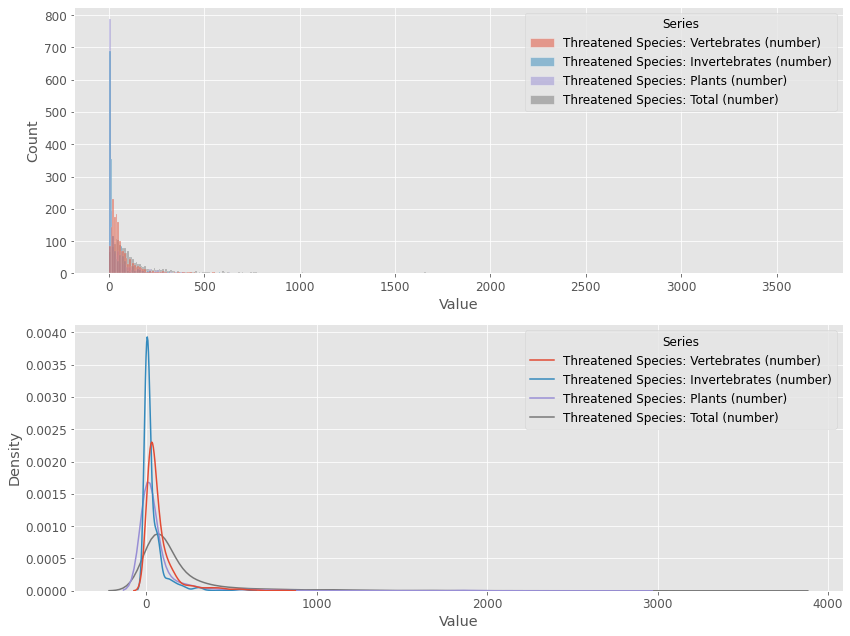

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1)
sns.histplot(data=df, x='Value', hue='Series', ax=ax1)
sns.kdeplot(data=df, x='Value', hue='Series', ax=ax2)

# Missing Values Exploration

In [18]:
df.isna().sum()

Code                   0
Region/Country/Area    0
Year                   0
Series                 0
Value                  0
dtype: int64

# Grouping and Aggregation

In [19]:
df_grpd = df.groupby('Region/Country/Area')
df_grpd.head()

,Code,Region/Country/Area,Year,Series,Value
0,4,Afghanistan,2004,Threatened Species: Vertebrates (number),31
1,4,Afghanistan,2010,Threatened Species: Vertebrates (number),31
2,4,Afghanistan,2015,Threatened Species: Vertebrates (number),31
3,4,Afghanistan,2018,Threatened Species: Vertebrates (number),34
4,4,Afghanistan,2019,Threatened Species: Vertebrates (number),33
...,...,...,...,...,...
6892,716,Zimbabwe,2004,Threatened Species: Vertebrates (number),24
6893,716,Zimbabwe,2010,Threatened Species: Vertebrates (number),34
6894,716,Zimbabwe,2015,Threatened Species: Vertebrates (number),38
6895,716,Zimbabwe,2018,Threatened Species: Vertebrates (number),42


# Data Visualization

In [20]:
# barplot helper function
def plot_bar(data, x, y, ci=None, color=None, hue=None, title=None, xlabel=None, ylabel=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart
    sns.barplot(
        data=data, 
        x=x, y=y, ci=ci, 
        hue=hue, color=color,
        ax=ax
    )

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    return plot_bar 

<function __main__.plot_bar(data, x, y, ci=None, color=None, hue=None, title=None, xlabel=None, ylabel=None)>

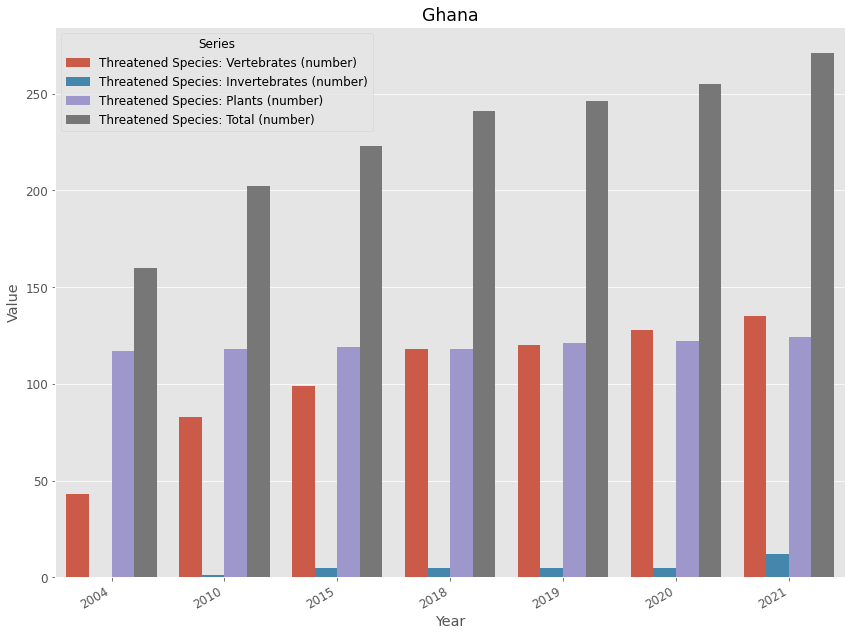

In [21]:
plot_bar(
    data=df_grpd.get_group('Ghana'),
    x='Year', y='Value', 
    hue='Series',
    title='Ghana', xlabel='Year', ylabel='Value'
)

<function __main__.plot_bar(data, x, y, ci=None, color=None, hue=None, title=None, xlabel=None, ylabel=None)>

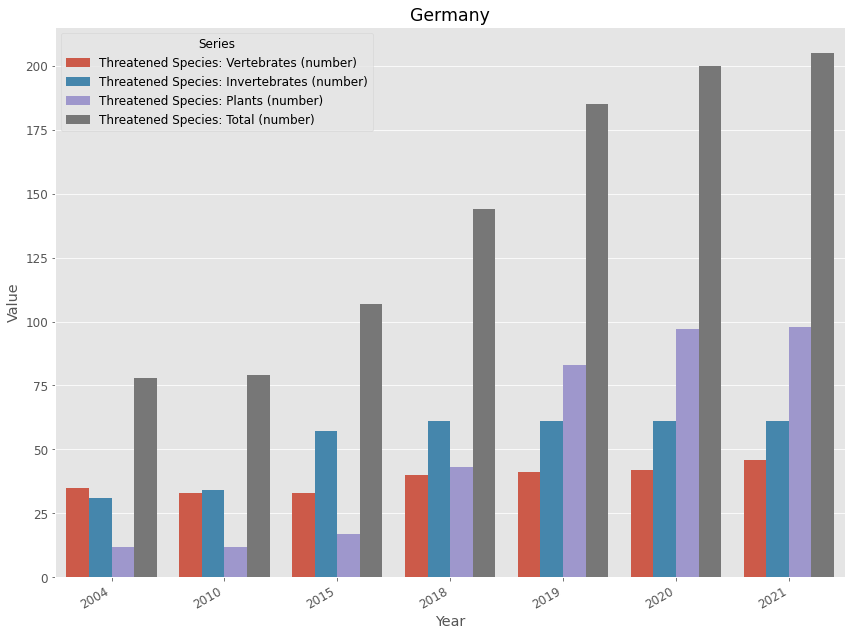

In [22]:
plot_bar(
    data=df_grpd.get_group('Germany'),
    x='Year', y='Value', 
    hue='Series',
    title='Germany', xlabel='Year', ylabel='Value'
)

<function __main__.plot_bar(data, x, y, ci=None, color=None, hue=None, title=None, xlabel=None, ylabel=None)>

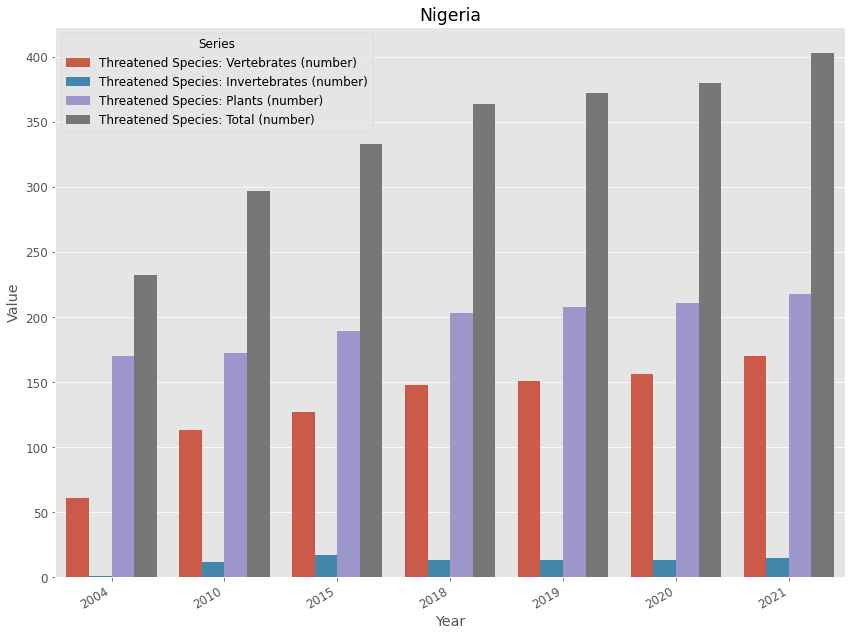

In [23]:
plot_bar(
    data=df_grpd.get_group('Nigeria'),
    x='Year', y='Value', 
    hue='Series',
    title='Nigeria', xlabel='Year', ylabel='Value'
)

<function __main__.plot_bar(data, x, y, ci=None, color=None, hue=None, title=None, xlabel=None, ylabel=None)>

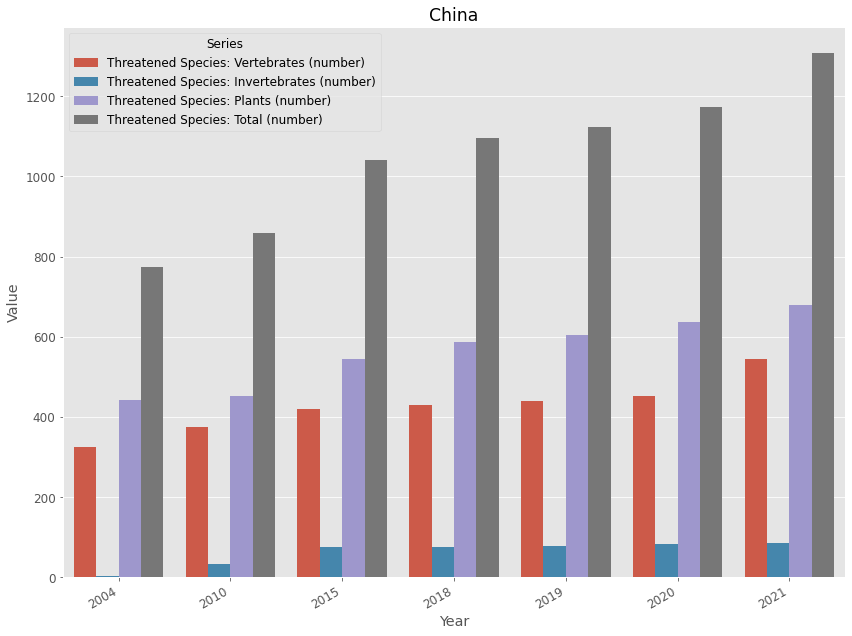

In [24]:
plot_bar(
    data=df_grpd.get_group('China'),
    x='Year', y='Value', 
    hue='Series',
    title='China', xlabel='Year', ylabel='Value'
)

<function __main__.plot_bar(data, x, y, ci=None, color=None, hue=None, title=None, xlabel=None, ylabel=None)>

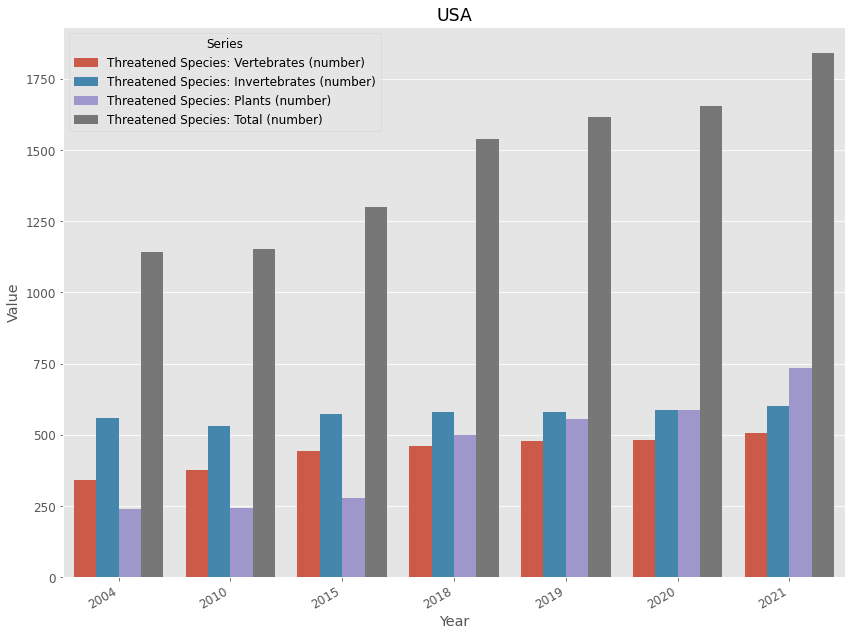

In [25]:
plot_bar(
    data=df_grpd.get_group('United States of America'),
    x='Year', y='Value', 
    hue='Series',
    title='USA', xlabel='Year', ylabel='Value'
)